## CS 5180 Reinforcement Learning and Sequential Decision Making
### Exercise 0: An Invitation to Reinforcement Learning

In [2]:
import numpy as np
from enum import Enum
import random
import matplotlib.pyplot as plt

### Four Rooms Environment

In [3]:
class Action(Enum):
    UP      = [ 0,  1]
    DOWN    = [ 0, -1]
    LEFT    = [-1,  0]
    RIGHT   = [ 1,  0]

class Environment:
    def __init__(self) -> None:

        self.WALLS = [
            [0, 5], [2, 5], [3, 5], [4, 5], [5, 5],
            [5, 0], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 9], [5, 10],
            [6, 4], [7, 4], [9, 4], [10, 4]
        ]

        self.GOAL = [10, 10]

    def __get_possible_states(self, state, action:Action):
        """
        This function returns an array with the all possible valid states, when the current state and an action is given as input
        """
        specified_state = list(map(sum, zip(state, action.value)))
        
        if not all(coordinate >= 0 and coordinate <= 10 for coordinate in specified_state) or specified_state in self.WALLS:
            specified_state = state

        noisy_actions = [Action.UP, Action.DOWN] if action == Action.RIGHT or action == Action.LEFT else [Action.LEFT, Action.RIGHT]
        noisy_states_unfiltered  = [list(map(sum, zip(state, noisy_action.value))) for noisy_action in noisy_actions]
        noisy_states = list(filter(lambda noisy_state: all(coordinate >= 0 and coordinate <= 10 for coordinate in noisy_state) and noisy_state not in self.WALLS,
                                    noisy_states_unfiltered))
        
        possible_states = [specified_state] + noisy_states
        return(possible_states)

    def __get_state(self, states:list):
        """
        This functions gets the possible valid states as input, and returns the final states chosen with weighted probability
        """
        if len(states) == 1:
            return states[0]
        
        chosen_state = random.choices(states, weights=[0.9, 0.1]) if len(states) == 2 else random.choices(states, weights=[0.8, 0.1, 0.1])
        return chosen_state[0]

    def simulate(self, current_state, action:Action):
        """
        Given the current state and an action, this function will return the next state
        """
        possible_states = self.__get_possible_states(current_state, action)
        # print(possible_states)
        chosen_state = self.__get_state(possible_states)
        reward = 1 if chosen_state == self.GOAL else 0
        return(chosen_state, reward)
    
    def set_new_goal(self):
        """
        Sets a new valid goal in the environment
        """
        new_goal = [random.randint(0,10), random.randint(0,10)]
        if new_goal in self.WALLS:
            self.set_new_goal()
        else:
            self.GOAL = new_goal

### Agent

In [5]:
class Agent:
    def __init__(self) -> None:
        self.state = [0, 0]
        self.reward = 0
        self.goal_found = False
        self.goal_location = []

    def reset_state(self):
        self.state = [0, 0]

    def new_state(self, new_state):
        self.state = new_state

    def get_dist_to_goal(self):
        """
        This function is only used in the learned policy
        """
        if not self.goal_found:
            return []
        return([self.goal_location[0]-self.state[0], self.goal_location[1] - self.state[1]])

### Manual Policy

In [60]:
agent = Agent()
print("Current State: [0, 0]\t1.UP 2.DOWN 3.LEFT 4.RIGHT")

while reward != 1:
    option = int(input("Select Action: "))
    if option == 1:
        action = Action.UP  
    elif option == 2:
        action = Action.DOWN
    elif option == 3:
        action = Action.LEFT
    elif option == 4:
        action = Action.RIGHT

    new_state, reward = environment.simulate(agent.state, action)
    agent.new_state(new_state)
    print(f"Action: {action.name}\tNew State: {agent.state}\tReward: {reward}")

print("GOAL REACHED!")
agent.reset_state()

Current State: [0, 0]	1.UP 2.DOWN 3.LEFT 4.RIGHT
Action: UP	New State: [1, 0]	Reward: 0
Action: UP	New State: [0, 0]	Reward: 0
Action: UP	New State: [0, 1]	Reward: 0
Action: UP	New State: [0, 2]	Reward: 0
Action: UP	New State: [0, 3]	Reward: 0
Action: UP	New State: [1, 3]	Reward: 0
Action: UP	New State: [1, 4]	Reward: 0
Action: UP	New State: [1, 5]	Reward: 0
Action: UP	New State: [1, 6]	Reward: 0
Action: UP	New State: [1, 7]	Reward: 0
Action: UP	New State: [1, 8]	Reward: 0
Action: RIGHT	New State: [2, 8]	Reward: 0
Action: RIGHT	New State: [3, 8]	Reward: 0
Action: RIGHT	New State: [3, 9]	Reward: 0
Action: DOWN	New State: [4, 9]	Reward: 0
Action: RIGHT	New State: [4, 8]	Reward: 0
Action: RIGHT	New State: [5, 8]	Reward: 0
Action: RIGHT	New State: [6, 8]	Reward: 0
Action: RIGHT	New State: [7, 8]	Reward: 0
Action: RIGHT	New State: [8, 8]	Reward: 0
Action: RIGHT	New State: [9, 8]	Reward: 0
Action: RIGHT	New State: [10, 8]	Reward: 0
Action: UP	New State: [10, 9]	Reward: 0
Action: UP	New State

### Initialization of Steps and Trials

In [6]:
num_steps = 10000
num_trials = 10

### Random Policy

In [7]:
agent = Agent()
cum_rewards_random = np.ndarray([num_trials, num_steps])

for trial in range(num_trials):
    agent.reset_state()
    agent.reward = 0

    for step in range(num_steps):
        action = random.choice(list(Action))
        new_state, reward = environment.simulate(agent.state, action)
        agent.new_state(new_state)
        
        if reward == 1:
            agent.reward += 1
            agent.reset_state()

        cum_rewards_random[trial][step] = agent.reward


### Plotting of Random policy

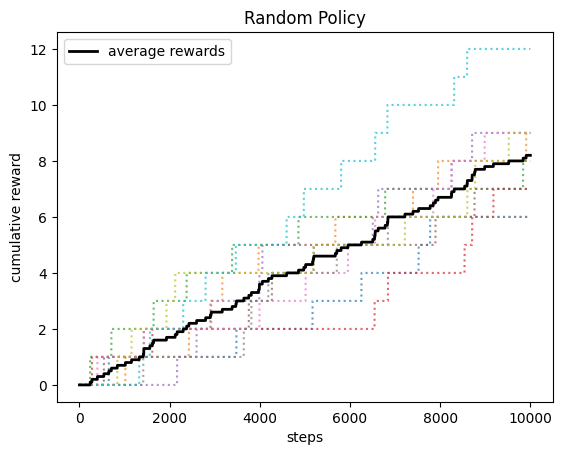

In [8]:
for trial in range(num_trials):
    plt.plot(cum_rewards_random[trial][:], linestyle="dotted", alpha = 0.7)
avg_cum_rewards_random = np.mean(cum_rewards_random, axis=0)
plt.plot(avg_cum_rewards_random, linewidth = 2, color = "black", label = "average rewards")
plt.title("Random Policy")
plt.xlabel("steps")
plt.ylabel("cumulative reward")
plt.legend()
plt.show()

#### Written: How do you think this compares with your manual policy? What are some reasons for the difference in performance?
Compared to the manual policy, the random policy takes much more number of steps to reach the goal. This is expected, since in the manual policy, we are essentially driving the robot to the goal with human intelligence. In random policy, it is purely left upto chance that the agent would reach the goal. Hence it is no surprise that the number of steps to reach the goal in random policy is orders of magnitude higher than that of manual policy. It should also be noted that while manual policy is almost guaranteed to reach the goal, it is very slow and hence running it for 10000 steps is not feasible.

### Better Policy

In [9]:
agent = Agent()
cum_rewards_better = np.ndarray([num_trials, num_steps])

for trial in range(num_trials):
    agent.reset_state()
    agent.reward = 0

    for step in range(num_steps):
        action = random.choices(list(Action), weights=[0.4, 0.1, 0.1, 0.4])
        new_state, reward = environment.simulate(agent.state, action[0])
        agent.new_state(new_state)
        
        if reward == 1:
            agent.reward += 1
            agent.reset_state()

        cum_rewards_better[trial][step] = agent.reward

### Plotting of Better policy

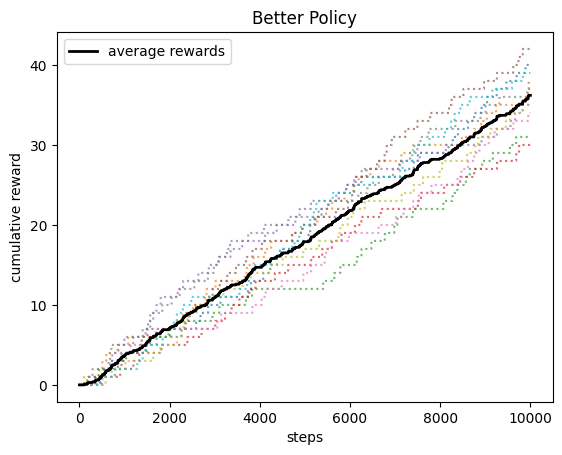

In [10]:
for trial in range(num_trials):
    plt.plot(cum_rewards_better[trial][:], linestyle="dotted", alpha = 0.7)
avg_cum_rewards_better = np.mean(cum_rewards_better, axis=0)

plt.plot(avg_cum_rewards_better, linewidth = 2, color = "black", label = "average rewards")
plt.title("Better Policy")
plt.xlabel("steps")
plt.ylabel("cumulative reward")
plt.legend()
plt.show()

### Worse policy

In [11]:
agent = Agent()
cum_rewards_worse = np.ndarray([num_trials, num_steps])

for trial in range(num_trials):
    agent.reset_state()
    agent.reward = 0

    for step in range(num_steps):
        action = random.choices(list(Action), weights=[0.20, 0.30, 0.30, 0.20])
        new_state, reward = environment.simulate(agent.state, action[0])
        agent.new_state(new_state)
        
        if reward == 1:
            agent.reward += 1
            agent.reset_state()

        cum_rewards_worse[trial][step] = agent.reward


### Plotting of Worse Policy

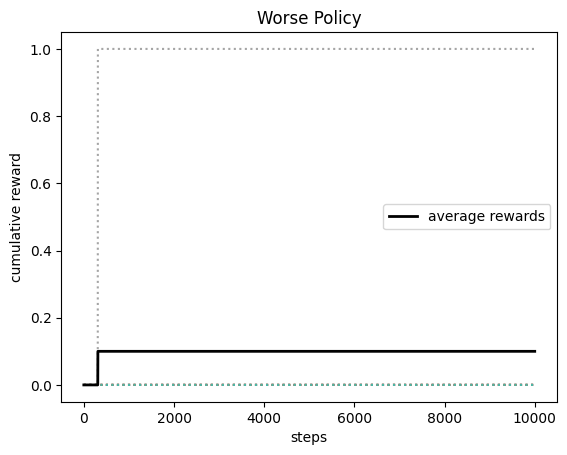

In [12]:
for trial in range(num_trials):
    plt.plot(cum_rewards_worse[trial][:], linestyle="dotted", alpha = 0.7)
avg_cum_rewards_worse = np.mean(cum_rewards_worse, axis=0)

plt.plot(avg_cum_rewards_worse, linewidth = 2, color = "black", label = "average rewards")
plt.title("Worse Policy")
plt.xlabel("steps")
plt.ylabel("cumulative reward")
plt.legend()
plt.show()

#### Written: Describe the strategy each policy uses, and why that leads to generally worse/better performance.

Better Strategy: For the better strategy, I have exploited the information that I know the goal location [10, 10]. Since the goal is in the top right corner of the environment, the better policy selects the action UP and RIGHT 80% of the time, and the actions DOWN and LEFT 20% of the time. This has led to and average cumulative reward of about 35 across 10 trials.

Worse Strategy: Opposite to the better policy, the worse policy choose LEFT and DOWN 60% of the time, and UP and RIGHT only 40% of the time. This significantly decreases the average cumulative reward to less than 1, since the agent is actively trying to avoid reaching the goal

### Learned Policy

In [18]:
agent = Agent()
cum_rewards_learned = np.ndarray([num_trials, num_steps])
environment.set_new_goal()
print("New Goal: ", environment.GOAL)

steps_to_goal = []
step_counter = 0

for trial in range(num_trials):
    agent.reset_state()
    agent.reward = 0
    
    for step in range(num_steps):
        if not agent.goal_found:
            action = random.choice(list(Action))
            step_counter += 1

        else:
            weights = [1, 1, 1, 1]
            dist_to_goal = agent.get_dist_to_goal()

            if dist_to_goal[0] > 0:
                weights[3] *= abs(dist_to_goal[0])
            elif dist_to_goal[0] < 0:
                weights[2] *= abs(dist_to_goal[0])

            if dist_to_goal[1] > 0:
                weights[0] *= abs(dist_to_goal[1])
            if dist_to_goal[1] < 0:
                weights[1] *= abs(dist_to_goal[1])

            action = random.choices(list(Action), weights=weights)[0]
            step_counter += 1

        new_state, reward = environment.simulate(agent.state, action)
        agent.new_state(new_state)
        
        if reward == 1:
            agent.goal_found = True
            agent.goal_location = agent.state
            agent.reward += 1
            agent.reset_state()

            steps_to_goal.append(step_counter)
            step_counter = 0

        cum_rewards_learned[trial][step] = agent.reward

New Goal:  [1, 9]


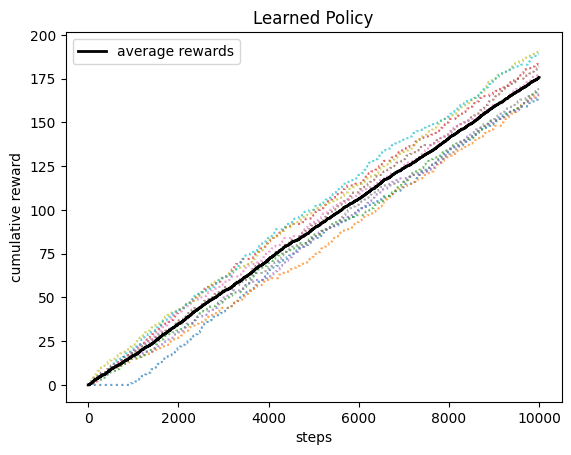

In [19]:
for trial in range(num_trials):
    plt.plot(cum_rewards_learned[trial][:], linestyle="dotted", alpha = 0.7)
avg_cum_rewards_learned = np.mean(cum_rewards_learned, axis=0)

plt.plot(avg_cum_rewards_learned, linewidth = 2, color = "black", label = "average rewards")
plt.title("Learned Policy")
plt.xlabel("steps")
plt.ylabel("cumulative reward")
plt.legend()
plt.show()

### Comparison of Policies in Plot

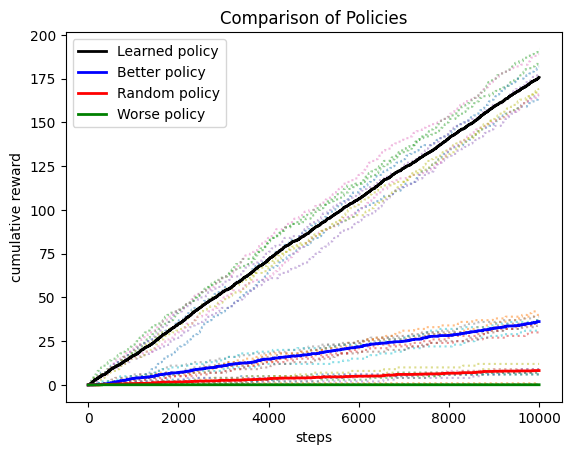

In [20]:
for trial in range(num_trials):
    plt.plot(cum_rewards_learned[trial][:], linestyle="dotted", alpha = 0.5)
    plt.plot(cum_rewards_better[trial][:], linestyle="dotted", alpha = 0.5)
    plt.plot(cum_rewards_random[trial][:], linestyle="dotted", alpha = 0.5)
    plt.plot(cum_rewards_worse[trial][:], linestyle="dotted", alpha = 0.5)

plt.plot(avg_cum_rewards_learned, linewidth = 2, color = "black", label = "Learned policy")
plt.plot(avg_cum_rewards_better, linewidth = 2, color = "blue", label = "Better policy")
plt.plot(avg_cum_rewards_random, linewidth = 2, color = "red", label = "Random policy")
plt.plot(avg_cum_rewards_worse, linewidth = 2, color = "green", label = "Worse policy")
plt.title("Comparison of Policies")
plt.xlabel("steps")
plt.ylabel("cumulative reward")
plt.legend()
plt.show()

### Analysis of Steps to the Goal

Steps to goal for the first time:  943
Average steps to goal after first time:  56.37927107061503


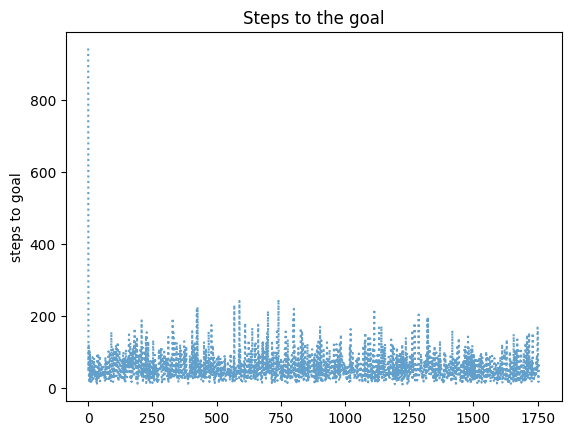

In [23]:
print("Steps to goal for the first time: ", steps_to_goal[0])
print("Average steps to goal after first time: ", np.mean(steps_to_goal[1:]))

plt.plot(steps_to_goal, linestyle = "dotted", alpha = 0.7)
plt.ylabel("steps to goal")
plt.title("Steps to the goal")
plt.show()

#### Written: Describe the strategy of your learning agent and the policy it uses, and explain how it has learned to act better.
A new goal for these trials was generated. The approach for the learned policy was that the agent would initially take random actions until the goal is reached. On reaching the goal, the agent would note the position of the goal and for each subsequent steps, the agent would calculate the difference between its own state and the goal in the horizontal and the vertical direction. Now depending upon the magnitude of this difference, the agent scales the weights of the actions that would minimize the distance between the agent and the goal. For example, if the difference between the agent's state and the goal is [-5, 1], highest weight would be given to action LEFT (since difference is negative) and the next highest weight would be give to UP (since difference is positive). This assignment of weights to the actions is done at every step, which ensures that the "most correct" action has the highest probability of getting chosen


This strategy was very effective in reducing the average number of steps to reach the goal. The agent took about 1000 steps to reach the goal for the first time, and once the goal was discovered, the average number of steps reduced to just about 56, which is a very significant change. The average cumulative reward using the learned policy is close to 200, which is the highest among all the policies